In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions', X.shape)

data dimensions (569, 30)


# Random Forest with Sklearn

In [16]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

prediction: [1]
true value: 1


In [17]:


print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 0.965034965034965


In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("decision tree accuracy:", dt.score(X_test, y_test))

decision tree accuracy: 0.9090909090909091


## Grid search Rand Forest Model

In [19]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
}

rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


## Elbow Graph
to find the sweet spot. Elbow Graph is a model that optimizes performance without adding unnecessary complexity.

In [20]:
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 30}


In [21]:
scores = gs.cv_results_['mean_test_score']
# print(scores)

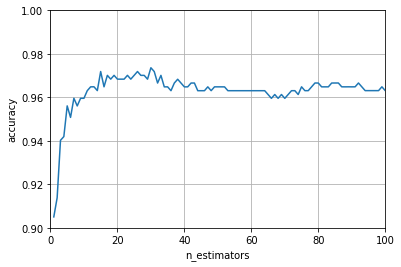

In [22]:
import matplotlib.pyplot as plt
scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel('accuracy')
plt.xlim(0,100)
plt.ylim(0.9,1)
plt.grid(b='Ture')
plt.show()


# import matplotlib.pyplot as plt

# scores = gs.cv_results_['mean_test_score']
# plt.plot(n_estimators, scores)
# plt.xlabel("n_estimators")
# plt.ylabel("accuracy")
# plt.xlim(0, 100)
# plt.ylim(0.9, 1)
# plt.show()

In [23]:
import numpy as np

test = gs.cv_results_['mean_test_score']

temp = np.argpartition(-test, 10)
result_args = temp[:4]

temp = np.partition(-test, 10)
result = -temp[:15]
print(result)

[0.9719143  0.9719143  0.97189877 0.97365316 0.97015991 0.97015991
 0.97015991 0.97015991 0.97014439 0.97014439 0.97014439 0.96840553
 0.96840553 0.96840553 0.96840553]


In [24]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y) 
print("best params:", gs.best_params_)

best params: {'n_estimators': 30}


<ipython-input-25-a0404ac60021>:46: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=max_text,xy=(max_scores[0],max_score),


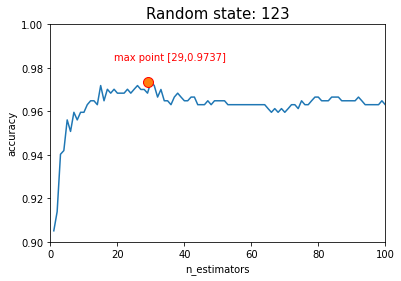

In [25]:
# -*- coding: utf-8 -*-
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_breast_cancer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV


# cancer_data=load_breast_cancer()
# df=pd.DataFrame(cancer_data['data'],columns=cancer_data['feature_names'])
# df['target']=cancer_data['target']
# X=df[cancer_data.feature_names]
# y=cancer_data['target']

n_estimators=list(range(1,101))
params_grid={
    'n_estimators': n_estimators,
    }
rnd_state=123
rf=RandomForestClassifier(random_state=rnd_state)
gs=GridSearchCV(rf,params_grid,cv=5)
gs.fit(X,y)
 #collect max datapoints
max_scores=[]
scores=gs.cv_results_['mean_test_score'].round(4)
max_score=np.max(scores)

max_scores=[m for m in range(len(scores)) if scores[m] == max_score]

#Graph Info
title='Random state: '+ str(rnd_state)
plt.plot(n_estimators,scores)
plt.title(title,size=15)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xlim(0,100)
plt.ylim(0.9,1.0)
plt.plot([max_scores],[max_score],
        marker='o',
        markersize=10,
        markerfacecolor=None,
        markeredgecolor='r')
if len(max_scores) ==1 :
    max_text='max point ['+ str(max_scores[0])+','+str(max_score)+']'
    plt.annotate(s=max_text,xy=(max_scores[0],max_score),
                  xytext=(max_scores[0]-10,max_score+0.01),
                  color='r',
                  size=10)
else:
    max_text='max : '+str(max_score)+' ('+str(len(max_scores))+' points)'
    plt.text(30.0,0.91,max_text,c='b',size =10)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=101)
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)
ft_imp = pd.Series(rf.feature_importances_, index=cancer_data.feature_names).sort_values(ascending=False)
print(ft_imp.head(15))


worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
area error              0.012605
worst texture           0.011080
mean area               0.009884
worst smoothness        0.009018
worst perimeter         0.008645
dtype: float64


In [29]:
rf.score(X_test, y_test)

0.965034965034965

In [30]:
worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [32]:
# print(df)

In [36]:
# df.columns

In [34]:
len(df.columns)

31

In [37]:
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)

In [38]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.972027972027972

In [40]:
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
lr_scores = []
rf_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))
print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))

LR accuracy: 0.36
RF accuracy: 0.8400000000000001
